In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the sightings_2025 dataset
data_2025 = pd.read_csv('data/sightings_2025.csv')
data_2025.head()

,report_link,sighting_dateTime,city,state_province,country,ufo_shape,report_summary,reported_dateTime,media,explanation
0,https://nuforc.org/sighting/?id=188754,2025-04-07 07:25:00,Coral Springs,FL,USA,Changing,"Flying, rotating black boomerang shaped object...",04/07/2025,False,NaN
1,https://nuforc.org/sighting/?id=188751,2025-04-06 21:15:00,Lone Jack,MO,USA,Light,Saw a light in the sky that appeared and disap...,04/06/2025,False,NaN
2,https://nuforc.org/sighting/?id=188753,2025-04-06 21:12:00,Delray Beach,FL,USA,Light,Diffuse anomalys light,04/07/2025,True,NaN
3,https://nuforc.org/sighting/?id=188758,2025-04-06 20:30:00,Hyde,England,United Kingdom,Changing,"Very bright light, would fade then grow bright...",04/07/2025,False,NaN
4,https://nuforc.org/sighting/?id=188756,2025-04-06 20:26:00,NaN,NaN,United Kingdom,Orb,Appeared 1 by 1 in a line,04/07/2025,True,Chinese Lantern?


In [ ]:
# Convert the "Sighting DateTime" column to datetime format
data_2025["Sighting DateTime"] = pd.to_datetime(data_2025["Sighting DateTime"])

# Filter the data for March 2025
april_2025_data = data_2025[
    (data_2025["Sighting DateTime"].dt.year == 2025) &
    (data_2025["Sighting DateTime"].dt.month == 3)
]
march_2025_data.tail()

,Report Link,Sighting DateTime,City,State Province,Country,UFO Shape,Report Summary,Reported DateTime,Media,Explanation
340,https://nuforc.org/sighting/?id=188040,2025-03-01 19:35:00,Washington,IL,USA,Star,Two straight lines of lights in a trail format...,03/01/2025,False,Starlink
341,https://nuforc.org/sighting/?id=188708,2025-03-01 19:30:00,Lakewood,WA,USA,Circle,Light that appeared to be a star but starts di...,04/03/2025,True,Drone?
342,https://nuforc.org/sighting/?id=188037,2025-03-01 17:29:00,Dublin,County Dublin,Ireland,Orb,They were like bright silver orbs than would d...,03/01/2025,True,NaN
343,https://nuforc.org/sighting/?id=188038,2025-03-01 15:30:00,Boynton Beach,FL,USA,Light,"2 lights seen at ocean park, boyton beach, fl ...",03/01/2025,True,NaN
344,https://nuforc.org/sighting/?id=188028,2025-03-01 03:34:00,Ocean Springs,MS,USA,Orb,I stepped outside since I heard a faint yellin...,03/01/2025,False,NaN


## Were there any days in March 2025 with spikes in sightings?

In [8]:
# Group the data by day and count the number of sightings
march_by_day = march_2025_data.groupby(
                                march_2025_data["Sighting DateTime"].dt.date
                                ).size().reset_index(name='Sightings')

march_by_day.head()

,Sighting DateTime,Sightings
0,2025-03-01,11
1,2025-03-02,9
2,2025-03-03,7
3,2025-03-04,9
4,2025-03-05,2


In [11]:
# Add a day column
march_by_day["Day"] = pd.to_datetime(march_by_day["Sighting DateTime"]).dt.day
march_by_day.head()

,Sighting DateTime,Sightings,Day
0,2025-03-01,11,1
1,2025-03-02,9,2
2,2025-03-03,7,3
3,2025-03-04,9,4
4,2025-03-05,2,5


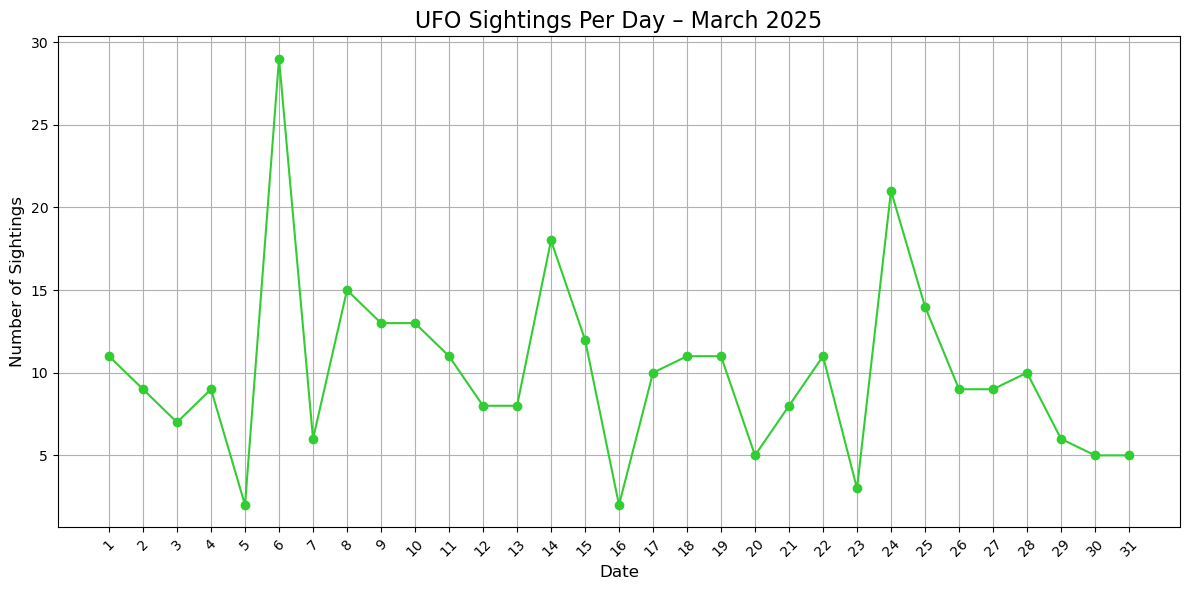

In [12]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(march_by_day["Day"], march_by_day["Sightings"], marker='o', color='limegreen')
plt.title("UFO Sightings Per Day – March 2025", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.xticks(range(1, 32))  # Days 1 through 31
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
# Create a dataFrame just for March 6
march_6_data = data_2025[
    (data_2025["Sighting DateTime"].dt.year == 2025) &
    (data_2025["Sighting DateTime"].dt.month == 3) &
    (data_2025["Sighting DateTime"].dt.day == 6)
]
march_6_data.head()

,Report Link,Sighting DateTime,City,State Province,Country,UFO Shape,Report Summary,Reported DateTime,Media,Explanation
278,https://nuforc.org/sighting/?id=188157,2025-03-06 21:00:00,Standish,MI,USA,Triangle,Notice it watching me from the tree line chase...,03/07/2025,True,NaN
279,https://nuforc.org/sighting/?id=188162,2025-03-06 20:36:00,Springfield,MA,USA,Changing,I was curious about an object that I noticed i...,03/07/2025,True,NaN
280,https://nuforc.org/sighting/?id=188263,2025-03-06 20:30:00,Charleston,WV,USA,Triangle,"Triangle ufo over shopping center, car sized o...",03/12/2025,False,NaN
281,https://nuforc.org/sighting/?id=188155,2025-03-06 20:00:00,Vashon,WA,USA,Changing,"Multi-colored, pulsing light ball that seemed ...",03/07/2025,True,Planet/Star
282,https://nuforc.org/sighting/?id=188154,2025-03-06 19:47:00,Brodek u Přerova,Olomouc Region,Czechia,Orb,Observation of two coloured flying objects,03/06/2025,False,NaN


In [23]:
print(f"Number of sightings on March 6, 2025: {march_6_data.count().iloc[0]}")

Number of sightings on March 6, 2025: 29


In [33]:
# Check sightings by country 
print(march_6_data["Country"].value_counts().sort_values(ascending=False))

Country
USA                     26
Czechia                  1
United Arab Emirates     1
Canada                   1
Name: count, dtype: int64


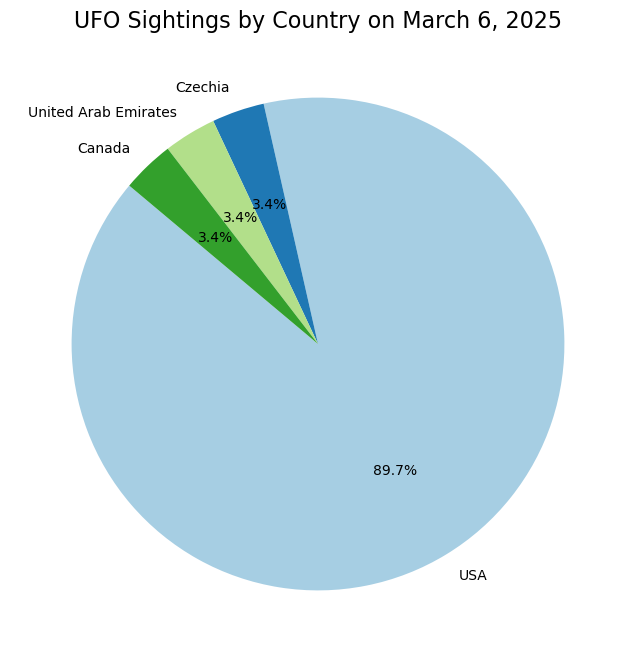

In [41]:
# Get the count of sightings by country
country_counts = march_6_data["Country"].value_counts().sort_values(ascending=False)

# Create a pie chart for the sightings by country
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("UFO Sightings by Country on March 6, 2025", fontsize=16)
plt.show()

In [38]:
# Filter the data to only include rows where the 'Country' column is 'USA'
usa_march_6_data = march_6_data[march_6_data["Country"] == "USA"]

In [39]:
# Count sightings per city in the USA and sort them in decreasing order
state_counts_usa = usa_march_6_data["State Province"].value_counts().sort_values(ascending=False)
print(state_counts_usa)

State Province
FL    18
CA     2
MI     1
MA     1
WV     1
WA     1
LA     1
GA     1
Name: count, dtype: int64


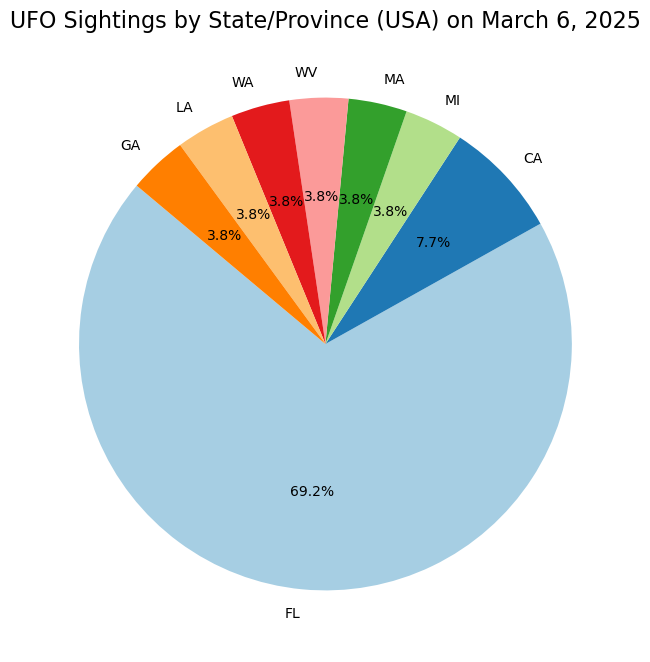

In [42]:
# Create a pie chart for sightings by state/province in the USA
plt.figure(figsize=(8, 8))
plt.pie(state_counts_usa, labels=state_counts_usa.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("UFO Sightings by State/Province (USA) on March 6, 2025", fontsize=16)
plt.show()

In [43]:
# Filter the data for FL sightings
fl_data = usa_march_6_data[usa_march_6_data["State Province"] == "FL"]
fl_data.head()

,Report Link,Sighting DateTime,City,State Province,Country,UFO Shape,Report Summary,Reported DateTime,Media,Explanation
284,https://nuforc.org/sighting/?id=188144,2025-03-06 19:02:00,Sunrise,FL,USA,Changing,I watched something flying through the sky.,03/06/2025,False,Rocket
285,https://nuforc.org/sighting/?id=188140,2025-03-06 18:56:00,West Palm Beach,FL,USA,Changing,Orb with trail and cluster of orbs blinking ar...,03/06/2025,True,Rocket
286,https://nuforc.org/sighting/?id=188145,2025-03-06 18:50:00,Coconut Creek,FL,USA,Orb,Bright orb whit twinkling likes moving at a fa...,03/06/2025,False,Rocket
287,https://nuforc.org/sighting/?id=188134,2025-03-06 18:45:00,Spring Hill,FL,USA,Oval,White flashing oval shaped with an aura behind...,03/06/2025,False,Rocket
288,https://nuforc.org/sighting/?id=188137,2025-03-06 18:44:00,Riverview,FL,USA,Circle,Ball of cloaked light appearing on fire with n...,03/06/2025,True,Rocket


In [44]:
# Count sightings per city in Florida
fl_city_counts = fl_data["City"].value_counts()

# Display the counts of sightings per city
print(fl_city_counts)

City
Sunrise              1
West Palm Beach      1
Bradenton            1
Davenport            1
Titusville           1
Miami Beach          1
Miami                1
Boynton Beach        1
Venice               1
Fruitland Park       1
Delray Beach         1
Jacksonville         1
Doral                1
Sunny Isles Beach    1
Riverview            1
Spring Hill          1
Coconut Creek        1
Port Orange          1
Name: count, dtype: int64


## What hours are most popular for UFO sightings?

In [58]:
# Convert 'Sighting DateTime' to datetime format for all of march_2025_data
march_2025_data.loc[:, 'Sighting DateTime'] = pd.to_datetime(march_2025_data['Sighting DateTime'])

# Extract the hour from the 'Sighting DateTime' column for all of march_2025_data
march_2025_data.loc[:, 'Hour'] = march_2025_data['Sighting DateTime'].dt.hour

march_2025_data.head()

,Report Link,Sighting DateTime,City,State Province,Country,UFO Shape,Report Summary,Reported DateTime,Media,Explanation,Hour
34,https://nuforc.org/sighting/?id=188651,2025-03-31 23:13:00,Groningen,Groningen,Netherlands,Light,Looking up at the sky from my window I saw a s...,03/31/2025,False,Satellite,23
35,https://nuforc.org/sighting/?id=188656,2025-03-31 21:58:00,Orlando,FL,USA,Changing,Saw yellow and orange flashing lights on hoffn...,03/31/2025,True,Rocket,21
36,https://nuforc.org/sighting/?id=188684,2025-03-31 20:46:00,Pinon,AZ,USA,Circle,Four white orb like lights appearing and inter...,04/02/2025,False,NaN,20
37,https://nuforc.org/sighting/?id=188655,2025-03-31 19:50:00,Phoenix,AZ,USA,Diamond,Diamond shaped craft with 3 pulsing white ligh...,03/31/2025,False,NaN,19
38,https://nuforc.org/sighting/?id=188648,2025-03-31 04:00:00,Toormina,New South Wales,Australia,Triangle,At 1st I thought it was birds or bats due to t...,03/30/2025,False,NaN,4


In [61]:
# Count sightings by hour for all of march_2025_data
sightings_by_hour = march_2025_data['Hour'].value_counts().sort_index()
print(sightings_by_hour)

Hour
0      6
1      5
2      9
3      5
4      7
5     10
6      5
7      5
8      7
9      5
10     4
11     4
12     4
13     2
14     4
15     6
16     5
17     9
18    22
19    32
20    52
21    43
22    38
23    22
Name: count, dtype: int64


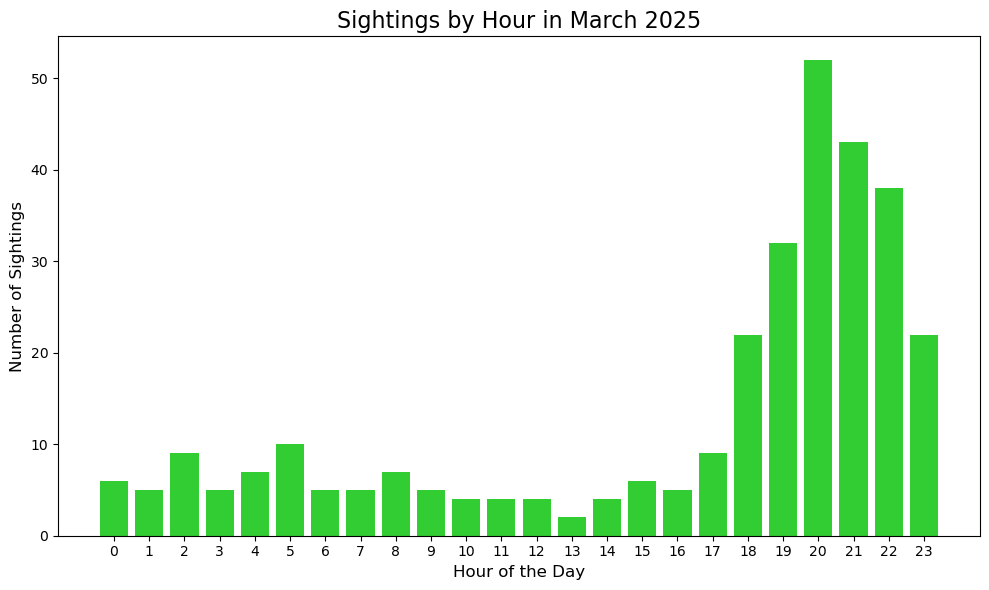

In [66]:
# Create a figure and axis object for more flexibility in customization
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a bar graph with sightings by hour
ax.bar(sightings_by_hour.index, sightings_by_hour.values, color='limegreen')

# Title and axis labels
ax.set_title('Sightings by Hour in March 2025', fontsize=16)
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Number of Sightings', fontsize=12)

# Customize x-axis ticks
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24), fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## What is the most predominant shape of the sightings?